In [1]:
import pandas as pd
import os
import numpy as np
import sys
from PIL import Image
sys.path.append("./src")
from util import *

In [2]:
def integrated_grad_PIL(PIL_img, target, lookup = None):
    if target == "race":
        model_path = "./models/race/race_v6.hdf5"
    elif target == "age":
        model_path = "./models/age/age_v1.hdf5"
    else:
        model_path = "./models/gender/gender_v1.hdf5"
        
    model = keras.models.load_model(model_path)
    ig = integrated_gradients(model)

    mapping = os.path.join("./mapping", target + ".json")
    with open(mapping) as f:
        mapping_dict = json.load(f)
    f.close()

    mapping_dict = {key.lower():val for key, val in mapping_dict.items()}
    mapping_dict_rev = {val:key for key, val in mapping_dict.items()}
    
    ############################THIS LINE IS IMPORTANT!!!!#################################
    PIL_img = resnet_v2.preprocess_input(np.array(PIL_img)[None, :]) ##IMPORTANT!!!
    output_prob = model.predict(PIL_img).squeeze()
    pred_idx = output_prob.argmax()
    
    if lookup == None:
        pass
    else:
        lookup = lookup.lower()
        pred_idx = mapping_dict[lookup]

    ex = ig.explain(PIL_img.squeeze(), outc=pred_idx)

    th = max(np.abs(np.min(ex)), np.abs(np.max(ex)))

    plt.figure(figsize = (6, 6))
    plt.imshow(ex[:,:,0], cmap="seismic", vmin=-1*th, vmax=th)
    plt.title("heatmap for {} {} with probability {:.2f}".format(target, mapping_dict_rev[pred_idx],
                                                                 output_prob[pred_idx]), fontsize=12)
    
    fig = plt.gcf()
    im = fig2img(fig)

    return im

In [3]:
data = pd.read_csv("/teams/DSC180A_FA20_A00/a01explainableai/a01capstonegroup03/fairface_label_val.csv")

In [4]:
val_path = "/teams/DSC180A_FA20_A00/a01explainableai/a01capstonegroup03/fairface_pad025"

data["file"] = data["file"].apply(lambda x: os.path.join(val_path, x))

In [5]:
ind.iloc[2,0]

NameError: name 'ind' is not defined

### Indian

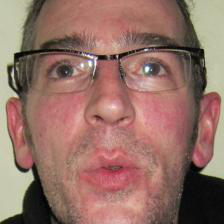

In [10]:
#4540, 1063, 2056
ind = data[data["race"] == "Indian"]
img = Image.open('/teams/DSC180A_FA20_A00/a01explainableai/a01capstonegroup03/fairface_pad025/val/9279.jpg')#Image.open(ind.iloc[2,0])
img

In [6]:
ind.iloc[2,0]

'/teams/DSC180A_FA20_A00/a01explainableai/a01capstonegroup03/fairface_pad025/val/31.jpg'

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Evaluated output channel (0-based index): All
Building gradient functions
Progress: 100.0%
Done.
array route
Explaning the 4th output.
sample shape (224, 224, 3)
input length: 2
input type: <class 'list'>
input shape: (50, 224, 224, 3)


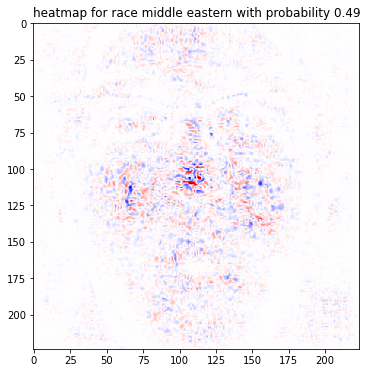

In [11]:
out = integrated_grad_PIL(img, "race")

### white

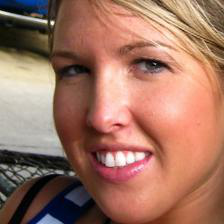

In [6]:
white = data[data["race"] == "White"]
img1 = Image.open('/teams/DSC180A_FA20_A00/a01explainableai/a01capstonegroup03/fairface_pad025/val/1063.jpg')
img1

In [7]:
white.iloc[3,0]

'/teams/DSC180A_FA20_A00/a01explainableai/a01capstonegroup03/fairface_pad025/val/22.jpg'

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Evaluated output channel (0-based index): All
Building gradient functions
Progress: 100.0%
Done.
array route
Explaning the 6th output.
sample shape (224, 224, 3)
input length: 2
input type: <class 'list'>
input shape: (50, 224, 224, 3)


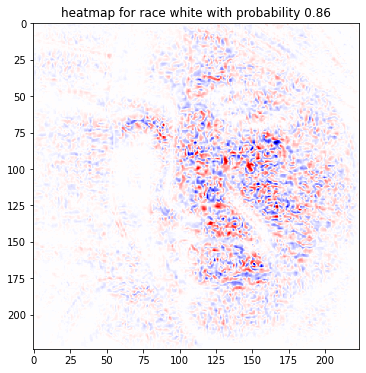

In [8]:
out1 = integrated_grad_PIL(img1, "race")

### East Asian

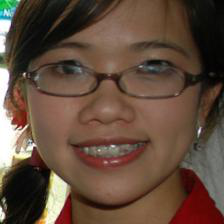

In [9]:
EA = data[data["race"] == "East Asian"]
img2 = Image.open(EA.iloc[7,0])
img2

In [10]:
EA.iloc[7,0]

'/teams/DSC180A_FA20_A00/a01explainableai/a01capstonegroup03/fairface_pad025/val/24.jpg'

In [ ]:
out2 = integrated_grad_PIL(img2, "race")

### Black

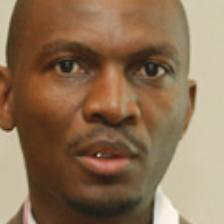

In [5]:
Black = data[data["race"] == "Black"]
img3 = Image.open(Black.iloc[3,0])
img3

In [6]:
Black.iloc[3,0]

'/teams/DSC180A_FA20_A00/a01explainableai/a01capstonegroup03/fairface_pad025/val/37.jpg'

Evaluated output channel (0-based index): All
Building gradient functions
Progress: 100.0%
Done.
array route
Explaning the 0th output.
sample shape (224, 224, 3)
input length: 2
input type: <class 'list'>
input shape: (50, 224, 224, 3)


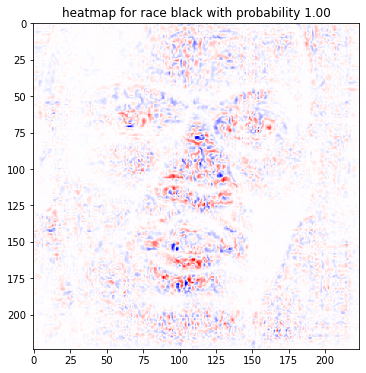

In [13]:
out3 = integrated_grad_PIL(img3, "race")

### Integrated-Grad example

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Activation, Dropout, Lambda, Dense
from tensorflow.keras import Sequential
from IntegratedGradients import *
import json
from tensorflow import keras
#from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from tensorflow.keras.applications import resnet_v2
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import dlib
import io

In [8]:
def linearly_interpolate(sample, reference=False, num_steps=50):
        # Use default reference values if reference is not specified
        if reference is False: reference = np.zeros(sample.shape);

        # Reference and sample shape needs to match exactly
        assert sample.shape == reference.shape

        # Calcuated stepwise difference from reference to the actual sample.
        ret = np.zeros(tuple([num_steps] +[i for i in sample.shape]))
        for s in range(num_steps):
            ret[s] = reference+(sample-reference)*(s*1.0/num_steps)

        return ret, num_steps, (sample-reference)*(1.0/num_steps)

In [9]:
a =linearly_interpolate(np.array(img3))

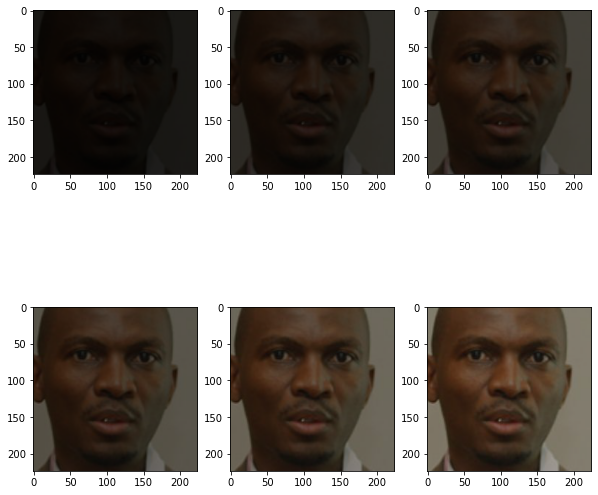

In [23]:
arr1 = a[0]

plt.subplots(2,3, figsize=(10, 10))

k = 1
for i in range(6):
    plt.subplot(2,3, i+1)
    k += 5
    plt.imshow(arr1[k].astype("uint8"))

In [17]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


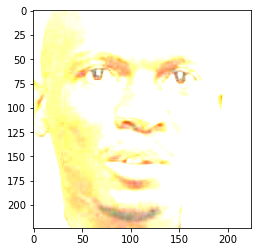

In [103]:
plt.imshow(a[2])

### Testing

In [19]:
#a[49]
tf.compat.v1.disable_eager_execution()
model = keras.models.load_model("./models/race/race_v6.hdf5")



In [172]:
outchannels = []
backend = K.backend()
input_tensors = []
verbose = 1

for i in model.inputs:
    input_tensors.append(i)

input_tensors.append(K.learning_phase())

if len(outchannels) == 0: 
    if verbose: print("Evaluated output channel (0-based index): All")
    outchannels = range(model.output.shape[1])
    
get_gradients = {}
if verbose: print("Building gradient functions")

# Evaluate over all requested channels.
for c in outchannels:
    # Get tensor that calculates gradient
    gradients = model.optimizer.get_gradients(model.output[:, c], model.input)
    # Build computational graph that computes the tensors given inputs
    get_gradients[c] = K.function(inputs=input_tensors, outputs=gradients)

Evaluated output channel (0-based index): All
Building gradient functions


In [175]:
model.optimizer.get_gradients()

<bound method OptimizerV2.get_gradients of <tensorflow.python.keras.optimizer_v2.nadam.Nadam object at 0x7f559bf24c10>>

In [180]:
gradients

[<tf.Tensor 'Nadam/gradients_27/gradients/conv1_pad_2/Pad_grad/Slice_1:0' shape=(None, 224, 224, 3) dtype=float32>]

In [29]:
reference = False
num_steps = 50
outc = 0
sample = resnet_v2.preprocess_input(np.array(img3)[None, :]).squeeze()
samples = []
numsteps = []
step_sizes = []

_output = integrated_gradients.linearly_interpolate(sample, reference, num_steps)
samples.append(_output[0])
numsteps.append(_output[1])
step_sizes.append(_output[2])

if verbose: print("Explaning the "+str(outchannels[outc])+"th output.")
    # For tensorflow backend
_input = []
for s in samples:
    _input.append(s)
_input.append(0)

gradients = get_gradients[outc](_input)

Explaning the 0th output.


In [171]:
_input[0].shape

(50, 224, 224, 3)

In [158]:
explanation = []
for i in range(len(gradients)):
    _temp = np.sum(gradients[i], axis=0)
    explanation.append(np.multiply(_temp, samples[0][49]))

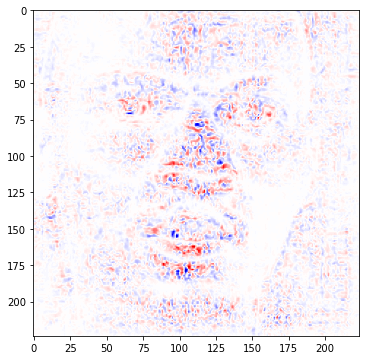

In [160]:
th = max(np.abs(np.min(ex)), np.abs(np.max(ex)))

plt.figure(figsize = (6, 6))
plt.imshow(ex[:,:,0], cmap="seismic", vmin=-1*th, vmax=th)

In [ ]:
'''
Input: sample to explain, channel to explain
Optional inputs:
    - reference: reference values (defaulted to 0s).
    - steps: # steps from reference values to the actual sample (defualted to 50).
Output: list of numpy arrays to integrated over.
'''
def explain(self, sample, outc=0, reference=False, num_steps=50, verbose=1):

    # Each element for each input stream.
    samples = []
    numsteps = []
    step_sizes = []

    # If multiple inputs are present, feed them as list of np arrays. 
    if isinstance(sample, list):
        #If reference is present, reference and sample size need to be equal.
        if reference != False: 
            assert len(sample) == len(reference)
        for i in range(len(sample)):
            if reference == False:
                _output = integrated_gradients.linearly_interpolate(sample[i], False, num_steps)
            else:
                _output = integrated_gradients.linearly_interpolate(sample[i], reference[i], num_steps)
            samples.append(_output[0])
            numsteps.append(_output[1])
            step_sizes.append(_output[2])

    # Or you can feed just a single numpy arrray. 
    elif isinstance(sample, np.ndarray):
        _output = integrated_gradients.linearly_interpolate(sample, reference, num_steps)
        samples.append(_output[0])
        numsteps.append(_output[1])
        step_sizes.append(_output[2])

    # Desired channel must be in the list of outputchannels
    assert outc in self.outchannels
    if verbose: print("Explaning the "+str(self.outchannels[outc])+"th output.")

    # For tensorflow backend
    _input = []
    for s in samples:
        _input.append(s)
    _input.append(0)

    if K.backend() == "tensorflow": 
        gradients = self.get_gradients[outc](_input)
    elif K.backend() == "theano":
        gradients = self.get_gradients[outc](_input)
        if len(self.model.inputs) == 1:
            gradients = [gradients]

    explanation = []
    for i in range(len(gradients)):
        _temp = np.sum(gradients[i], axis=0)
        explanation.append(np.multiply(_temp, step_sizes[i]))

    # Format the return values according to the input sample.
    if isinstance(sample, list):
        return explanation
    elif isinstance(sample, np.ndarray):
        return explanation[0]
    return -1


In [ ]:
class integrated_gradients:
# model: Keras model that you wish to explain.
# outchannels: In case the model are multi tasking, you can specify which output you want explain .
def __init__(self, model, outchannels=[], verbose=1):

    #get backend info (either tensorflow or theano)
    self.backend = K.backend()

    #load model supports keras.Model and keras.Sequential
    if isinstance(model, Sequential):
        self.model = model#model.model
    elif isinstance(model, Model):
        self.model = model
    else:
        print("Invalid input model")
        return -1

    #load input tensors
    self.input_tensors = []
    for i in self.model.inputs:
        self.input_tensors.append(i)
    # The learning phase flag is a bool tensor (0 = test, 1 = train)
    # to be passed as input to any Keras function that uses 
    # a different behavior at train time and test time.
    self.input_tensors.append(K.learning_phase())

    #If outputchanels are specified, use it.
    #Otherwise evalueate all outputs.
    self.outchannels = outchannels
    if len(self.outchannels) == 0: 
        if verbose: print("Evaluated output channel (0-based index): All")
        if K.backend() == "tensorflow":
            #########################ORIGINAL!######
            #self.outchannels = range(self.model.output.shape[1]._value)
            self.outchannels = range(self.model.output.shape[1])
        elif K.backend() == "theano":
            self.outchannels = range(self.model.output._keras_shape[1])
    else:
        if verbose: 
            print("Evaluated output channels (0-based index):")
            print(','.join([str(i) for i in self.outchannels]))

    #Build gradient functions for desired output channels.
    self.get_gradients = {}
    if verbose: print("Building gradient functions")

    # Evaluate over all requested channels.
    for c in self.outchannels:
        # Get tensor that calculates gradient
        if K.backend() == "tensorflow":
            gradients = self.model.optimizer.get_gradients(self.model.output[:, c], self.model.input)
        if K.backend() == "theano":
            gradients = self.model.optimizer.get_gradients(self.model.output[:, c].sum(), self.model.input)

        # Build computational graph that computes the tensors given inputs
        self.get_gradients[c] = K.function(inputs=self.input_tensors, outputs=gradients)

        # This takes a lot of time for a big model with many tasks.
        # So lets print the progress.
        if verbose:
            sys.stdout.write('\r')
            sys.stdout.write("Progress: "+str(int((c+1)*1.0/len(self.outchannels)*1000)*1.0/10)+"%")
            sys.stdout.flush()
    # Done
    if verbose: print("\nDone.")

In [185]:
import tensorflow as tf

In [186]:
def f(x):
  """A simplified model function."""
  return tf.where(x < 0.8, x, 0.8)

def interpolated_path(x):
  """A straight line path."""
  return tf.zeros_like(x)

x = tf.linspace(start=0.0, stop=1.0, num=6)
y = f(x)

AttributeError: 'Tensor' object has no attribute 'ndim'

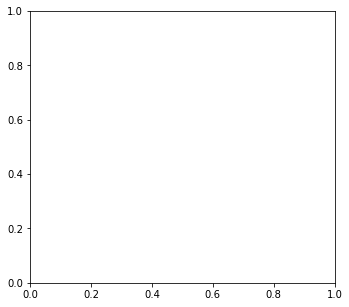

In [187]:
fig = plt.figure(figsize=(12, 5))
ax0 = fig.add_subplot(121)
ax0.plot(x, f(x), marker='o')
ax0.set_title('Gradients saturate over F(x)', fontweight='bold')
ax0.text(0.2, 0.5, 'Gradients > 0 = \n x is important')
ax0.text(0.7, 0.85, 'Gradients = 0 \n x not important')
ax0.set_yticks(tf.range(0, 1.5, 0.5))
ax0.set_xticks(tf.range(0, 1.5, 0.5))
ax0.set_ylabel('F(x) - model true class predicted probability')
ax0.set_xlabel('x - (pixel value)')

ax1 = fig.add_subplot(122)
ax1.plot(x, f(x), marker='o')
ax1.plot(x, interpolated_path(x), marker='>')
ax1.set_title('IG intuition', fontweight='bold')
ax1.text(0.25, 0.1, 'Accumulate gradients along path')
ax1.set_ylabel('F(x) - model true class predicted probability')
ax1.set_xlabel('x - (pixel value)')
ax1.set_yticks(tf.range(0, 1.5, 0.5))
ax1.set_xticks(tf.range(0, 1.5, 0.5))
ax1.annotate('Baseline', xy=(0.0, 0.0), xytext=(0.0, 0.2),
             arrowprops=dict(facecolor='black', shrink=0.1))
ax1.annotate('Input', xy=(1.0, 0.0), xytext=(0.95, 0.2),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.show();